In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\md mumtaz\Documents\Naresh it\Visadataset.csv"

In [3]:
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Box plot**

- box plot is used to identify the outliers
- outlier is an observation having huge positive value or negative value
- Q1=25p, Q2=50p, Q3=75p
- IQR=inter quartile range=Q3-Q1
- Q3+1.5*IQR and Q1-1.5*IQR


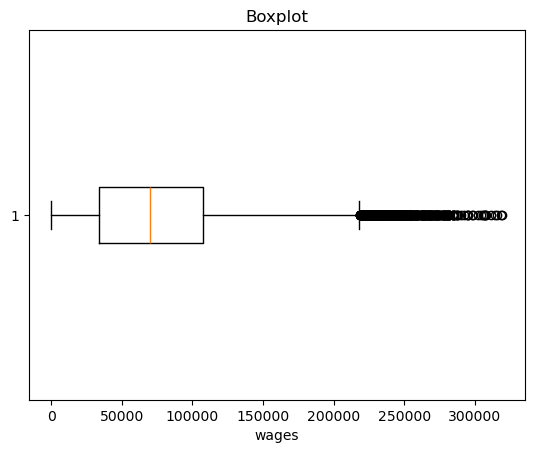

In [4]:
#read the prevailing wage data and plot the box plot
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

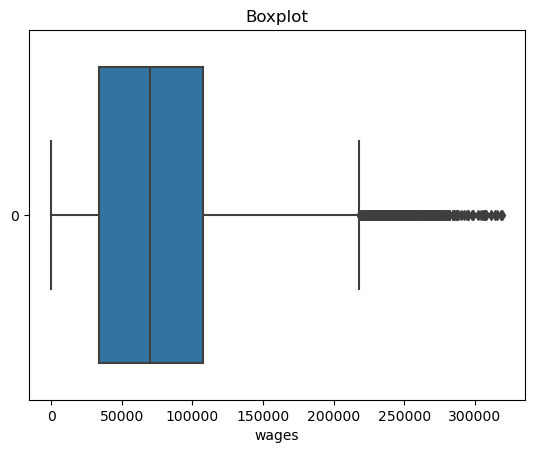

In [5]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

**plot the histogram plot and box plot side by side**

{'whiskers': [<matplotlib.lines.Line2D at 0x257d90707d0>,
 'caps': [<matplotlib.lines.Line2D at 0x257d9071650>,
 'boxes': [<matplotlib.lines.Line2D at 0x257d9062c10>],
 'medians': [<matplotlib.lines.Line2D at 0x257d907cf90>],
 'fliers': [<matplotlib.lines.Line2D at 0x257d8fb3710>],
 'means': []}

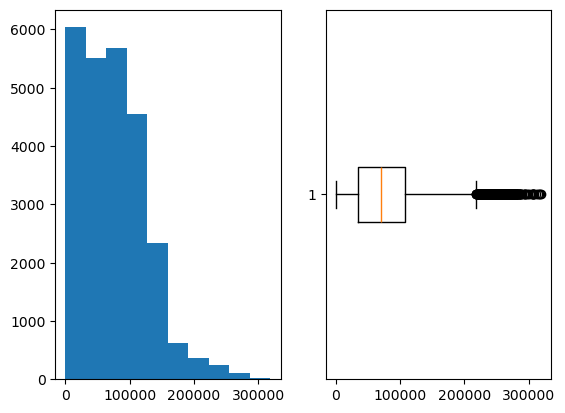

In [6]:
wage_data=visa_df['prevailing_wage']
plt.subplot(1,2,1)
plt.hist(wage_data)
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)

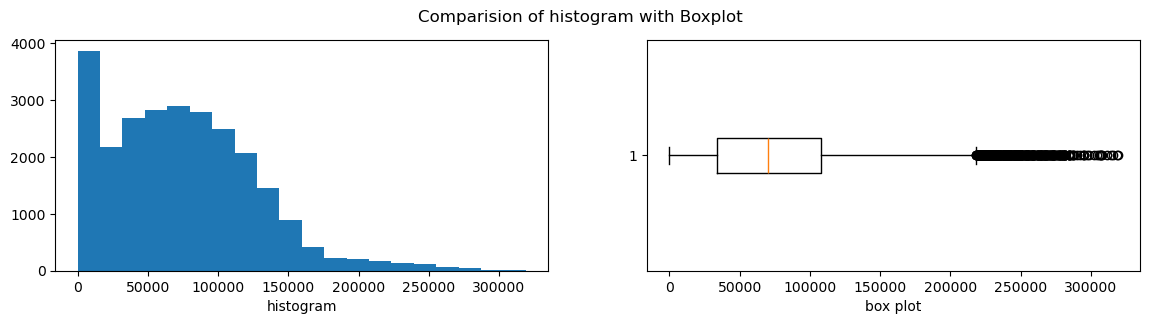

In [7]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data, bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('box plot')
plt.show()

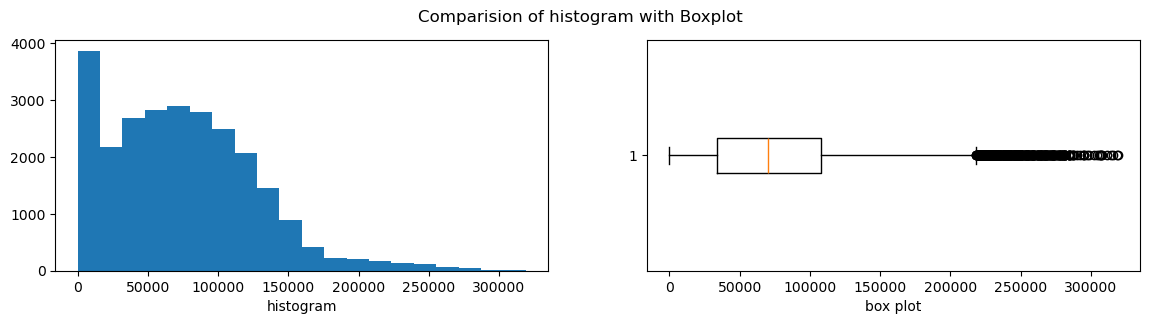

In [8]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data, bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('box plot')
plt.show()

**finding the outliers**

- we already know that ouliers avilable less than Q1-1.5*IQR and Q3+1.5*IQR
- step-1:
    - Calculate Q1=25p
    - calculate Q2=50p
    - calculate Q3=75

- step-2:
    - calculate IQR=Q3-Q1

- step-3:
    - calculate LB=Q1-1.5*IQR
    - Calculate UB=Q3+1.5*IQR

- step-4:
   - con1=wage data <LB
   - con2=wage data >UB
   - con3=con1 or conn2(use bitwise operator)
     
- step-5:Data[con3]

In [15]:
wage_data=visa_df['prevailing_wage']
#step1:
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
#step2:
IQR=q3-q1
#step-3:
lb=q1-1.5*IQR
ub=-q3+1.5*IQR
# step-4:
con1=wage_data>lb  # t f
con2=wage_data<ub  # T F
con3=con1&con2
# bitwise operator used to compare
# bits data===0 and 1== True False
non_outliers_data=wage_data[con3]
non_outliers_data

0         592.2029
7         418.2298
36       2490.1200
54        230.8072
62        103.2216
           ...    
25444     156.6070
25450     682.1048
25461      54.9196
25465     481.2238
25470     516.4101
Name: prevailing_wage, Length: 2433, dtype: float64

In [24]:
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
36,EZYV37,Europe,High School,Y,N,2520,1981,West,2490.1200,Year,Y,Denied
54,EZYV55,Asia,Master's,Y,N,11733,1995,Northeast,230.8072,Hour,Y,Certified
62,EZYV63,Asia,High School,N,N,5110,2004,West,103.2216,Hour,Y,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...
25444,EZYV25445,South America,Master's,Y,N,1081,1838,Northeast,156.6070,Hour,Y,Certified
25450,EZYV25451,Asia,Bachelor's,N,N,3312,2009,Northeast,682.1048,Hour,Y,Denied
25461,EZYV25462,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified


- we have two dataframe
- visa_df: total data 25480
- non_outliers_df=after removing outliers 25053
- first plot nonoultliers data prevailing 

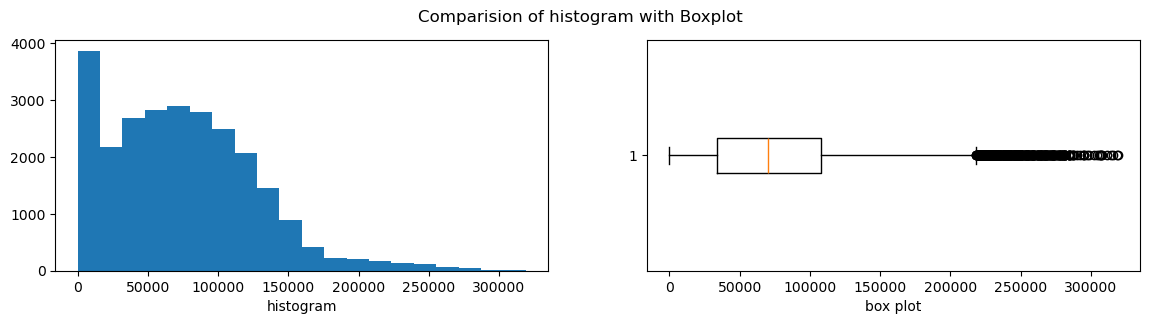

In [25]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data, bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('box plot')
plt.show()

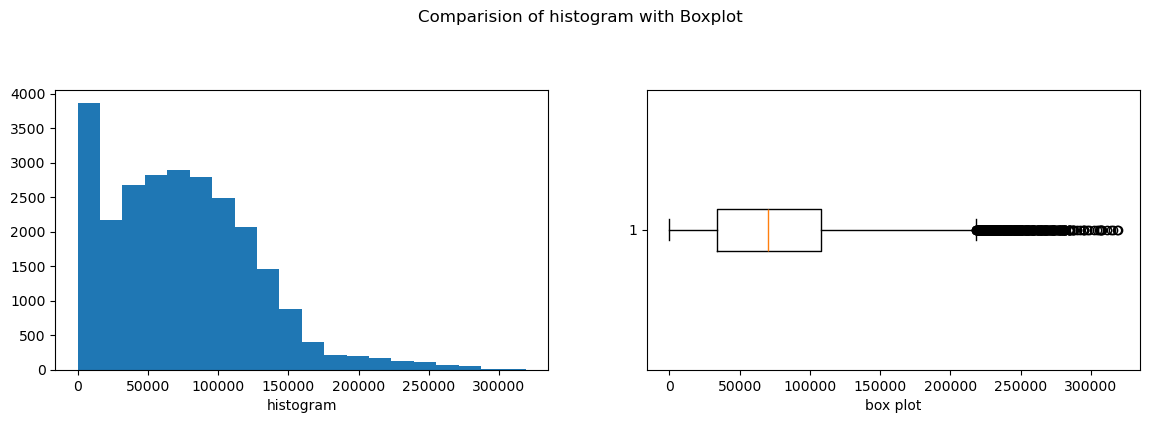

In [26]:
#####################data###############################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
######################non outliers########################
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data, bins=20)
plt.xlabel('histogram')
plt.subplot(2,2,2).boxplot(wage_data,vert=False)
plt.xlabel('box plot')
##########################entire data ###############################
plt.show()

In [ ]:
# fill the ouliers of wage data with wage median
# 427 outliers
# 427 should replace with median value
# again draw trhe plots

- or behavior:
  - suppose we take two indivisual conditions
  - if any one True, the final is becomes True
  - both conditions should be true

In [ ]:
# some exam
# age <35
# degree
you can appear the exam if 

In [27]:
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


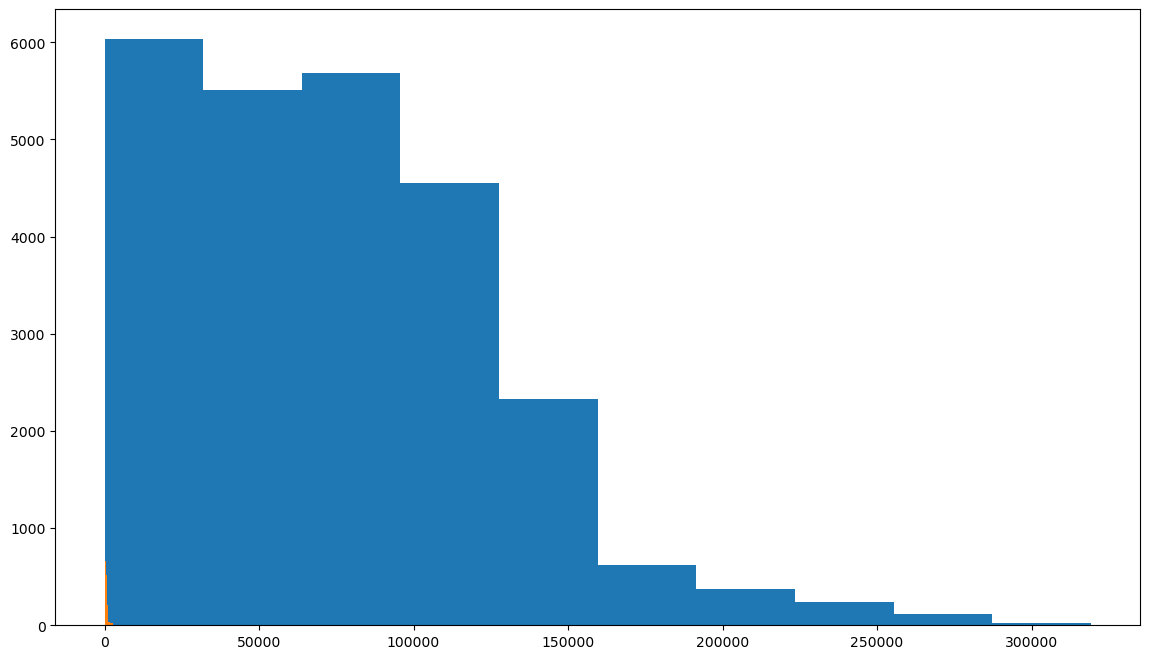

In [33]:
#####################data###############################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
######################non outliers########################
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**how to deal the outliers**

- 1. we can drop the outliers
    - droping outliers is an easy task, but not recomended
   - if you drop the outliers we are droping the rows
  - which means we are droping the other column values also
  - may be some important information we might loose from other column values
  - But in industry if outliers percentage less than 2% of the total data, we can drop
  - the number of outliers in pwage is 427
  - the number of total observasion is 25480
- the percentage is 1.67 which is less than 2%


- 2.  fill with median value
    - we alredy know that outliers does not affect by median
  - so it is the best practice to fill the outliers with median

- 3. capping or Florring
   - instead of fill with median
   - we can fill with certain values
   - the outliers which are less than lb fill with lb values
   - the outliers which are greater than ub fill with ub value

**isolation forest**

  - is ML model used to find the outliers and anamolies

In [38]:
outliers_df['prevailing_wage']

0         592.2029
7         418.2298
36       2490.1200
54        230.8072
62        103.2216
           ...    
25444     156.6070
25450     682.1048
25461      54.9196
25465     481.2238
25470     516.4101
Name: prevailing_wage, Length: 2433, dtype: float64

**fill with median value**

**np.where**

- in numpy we have  method called where

- it takes three arguments
  - 1. condition
  - 2. value if condition is True
  - 3. value if condition is False

- it is aaplicable for only binary means if and else

In [41]:
# for value in wage_data:
#     if value < LB or value > UB:
#             median=wage_data.median()
#             list.append(median)
#     else:
#         list.append(value)

    

In [42]:
dict1={'Sub':['DS','DE','CS'],
      'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [46]:
# qn: i want to replace marks with1, which are greater than 100
dict1={'Sub':['DS','DE','CS'],
      'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [48]:
# np.where (<condition>, <true>,<false>)
con=df['marks']>100 
np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [52]:
# implement for the outliers
con1=wage_data<lb
con2=wage_data>ub
con= con1 | con2

wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([  592.2029, 70308.21  , 70308.21  , ..., 70308.21  , 70308.21  ,
       70308.21  ])

In [53]:
visa_df['prevailing_wage_update']=l

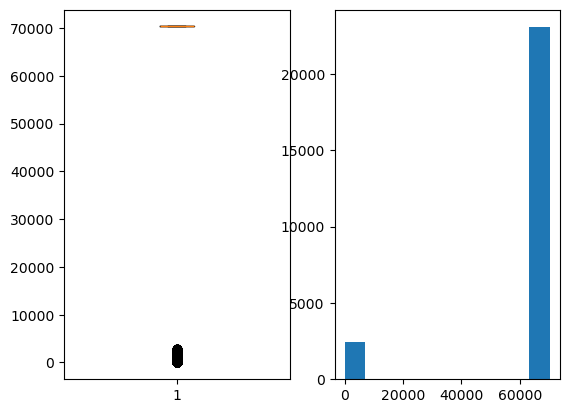

In [55]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SyntaxError: invalid syntax (2401071851.py, line 1)